Get the data from drive

In [3]:
!cp '/content/drive/My Drive/surface.zip' ./

Extracting the files

In [4]:
!unzip surface.zip

Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

Importing the libraries

In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Preprocess the images
def extractimages(data_dir):
    X = list() 
    y = list()
    for entity in ['Negative', 'Positive']: 
        class_position = ['Negative', 'Positive'].index(entity)
        for image in os.listdir(os.path.join(data_dir, entity)):
            scaled_image = cv2.resize(cv2.imread(os.path.join(os.path.join(data_dir, entity), image), cv2.IMREAD_GRAYSCALE), (120, 120)) 
            X.append(scaled_image)
            y.append(class_position)
            #main_data.append([scaled_image, class_position])
    return np.array(X).reshape(-1, 120, 120, 1)/255,np.array(y)

X,y = extractimages('./')

In [8]:
X.shape

(40000, 120, 120, 1)

In [9]:
y.shape

(40000,)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)

In [11]:
X_train.shape

(28000, 120, 120, 1)

In [12]:
y_train.shape

(28000,)

In [19]:
# Building the CNN model
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = X.shape[-3:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 120, 120, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [12]:
# To save RAM
del X

In [13]:
del y

In [14]:
del X_test

In [15]:
del y_test

In [16]:
import psutil
psutil.virtual_memory().percent
psutil.virtual_memory()

svmem(total=13653614592, available=7831719936, percent=42.6, used=11166699520, free=627634176, active=6181146624, inactive=6343274496, buffers=34066432, cached=1825214464, shared=11575296, slab=237821952)

In [14]:
# Training the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=1e-4), metrics=["accuracy"]) 

history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_split = 0.107, verbose=1)

Epoch 1/15
782/782 [==============================] - 60s 38ms/step - loss: 0.3483 - accuracy: 0.8439 - val_loss: 0.1145 - val_accuracy: 0.9559
Epoch 2/15
782/782 [==============================] - 28s 36ms/step - loss: 0.1081 - accuracy: 0.9652 - val_loss: 0.0581 - val_accuracy: 0.9816
Epoch 3/15
782/782 [==============================] - 28s 36ms/step - loss: 0.0747 - accuracy: 0.9776 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 4/15
782/782 [==============================] - 28s 36ms/step - loss: 0.0535 - accuracy: 0.9855 - val_loss: 0.0483 - val_accuracy: 0.9856
Epoch 5/15
782/782 [==============================] - 28s 36ms/step - loss: 0.0432 - accuracy: 0.9886 - val_loss: 0.0396 - val_accuracy: 0.9953
Epoch 6/15
782/782 [==============================] - 28s 36ms/step - loss: 0.0374 - accuracy: 0.9917 - val_loss: 0.0333 - val_accuracy: 0.9903
Epoch 7/15
782/782 [==============================] - 28s 36ms/step - loss: 0.0317 - accuracy: 0.9915 - val_loss: 0.0258 - val_accuracy:

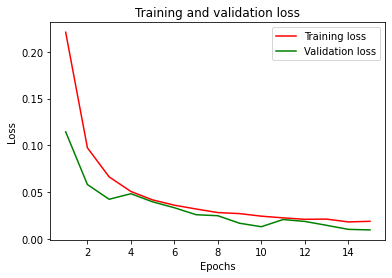

In [15]:
# Plotting training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

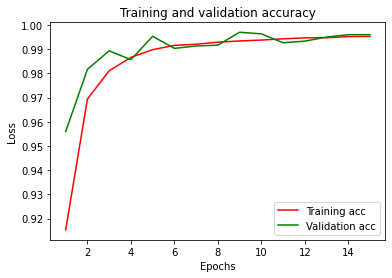

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model metrics
prediciton = model.predict(X_test)
class_predict = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, class_predict)
recall = recall_score(y_test, class_predict)
precision = precision_score(y_test, yhat_classes)
f1 = f1_score(y_test, class_predict)